In [2]:
import os
import great_expectations as ge
import pandas as pd

csvFile = os.path.abspath(os.path.dirname(os.getcwd())) + "/data/Titanic.csv"
df=pd.read_csv(csvFile)
df.head()


,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


<Axes: >

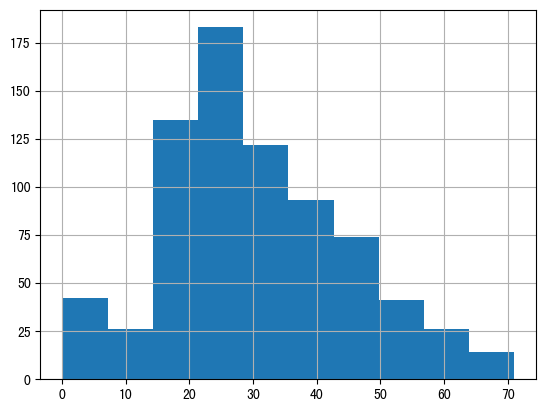

In [3]:
df.Age.hist()

In [4]:
from ydata_profiling import ProfileReport
report = ProfileReport(
    df,
    title="一个数据报告"
)
report.to_notebook_iframe()
# report.to_file("Titanic_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
my_df = ge.from_pandas(df)
# check the type
type(my_df)

great_expectations.dataset.pandas_dataset.PandasDataset

# 注意： 对于字符类型的长度处理

In [12]:
# check number of rows in the dataset
my_df.expect_column_value_lengths_to_be_between("Sex", 2, 5 )

{
  "success": false,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 462,
    "unexpected_percent": 35.186595582635185,
    "unexpected_percent_total": 35.186595582635185,
    "unexpected_percent_nonmissing": 35.186595582635185,
    "partial_unexpected_list": [
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [13]:
# check if column exists
my_df.expect_column_value_lengths_to_equal("Sex", 6 )

{
  "success": false,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 851,
    "unexpected_percent": 64.81340441736482,
    "unexpected_percent_total": 64.81340441736482,
    "unexpected_percent_nonmissing": 64.81340441736482,
    "partial_unexpected_list": [
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [16]:
my_df.expect_column_values_to_match_regex('Sex',".*X.*" )

{
  "success": false,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 1313,
    "unexpected_percent": 100.0,
    "unexpected_percent_total": 100.0,
    "unexpected_percent_nonmissing": 100.0,
    "partial_unexpected_list": [
      "female",
      "female",
      "male",
      "female",
      "male",
      "male",
      "female",
      "male",
      "female",
      "male",
      "male",
      "female",
      "female",
      "male",
      "male",
      "female",
      "male",
      "male",
      "male",
      "female"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [17]:
my_df.expect_column_values_to_not_match_regex('Sex',".*X.*" )

{
  "success": true,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

# 多个正则表达式的校验与匹配，规则命中一个即认为是正常的expected， 没有命中则认为是异常的 unexpected！

# Expect the column entries to be strings that can be matched to either any of or all of a list of regular expressions. Matches can be anywhere in the string.

In [19]:
my_df.expect_column_values_to_match_regex_list( 'Sex', (".*X.*", ".*f.*" ) )


{
  "success": false,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 851,
    "unexpected_percent": 64.81340441736482,
    "unexpected_percent_total": 64.81340441736482,
    "unexpected_percent_nonmissing": 64.81340441736482,
    "partial_unexpected_list": [
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male",
      "male"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [21]:
my_df.expect_column_values_to_not_match_regex_list( 'Sex', (".*X.*", ".*f.*" ))


{
  "success": false,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 462,
    "unexpected_percent": 35.186595582635185,
    "unexpected_percent_total": 35.186595582635185,
    "unexpected_percent_nonmissing": 35.186595582635185,
    "partial_unexpected_list": [
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female",
      "female"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [22]:
my_df.expect_column_values_to_match_like_pattern( 'Sex', "%f%")


AttributeError: 'PandasDataset' object has no attribute 'expect_column_values_to_match_like_pattern'